
🔵 Candidate Phrases:
['artificial intelligence', 'ai', 'industries', 'the globe', 'healthcare', 'ai-powered diagnosis tools', 'robotic surgeries', 'patient monitoring systems', 'financial institutions', 'ai', 'fraud detection', 'algorithmic trading', 'customer service chatbots', 'the transportation sector', 'changes', 'autonomous vehicles', 'intelligent traffic management', 'its advantages', 'ai', 'ethical dilemmas', 'data privacy issues', 'algorithmic bias', 'job automation concerns', 'research organizations', 'governments', 'guidelines', 'the responsible development', 'ai technologies', 'future innovations', 'ai', 'daily life', 'education', 'entertainment', 'personalized services']

TF-IDF Matrix Shape: (34, 58)


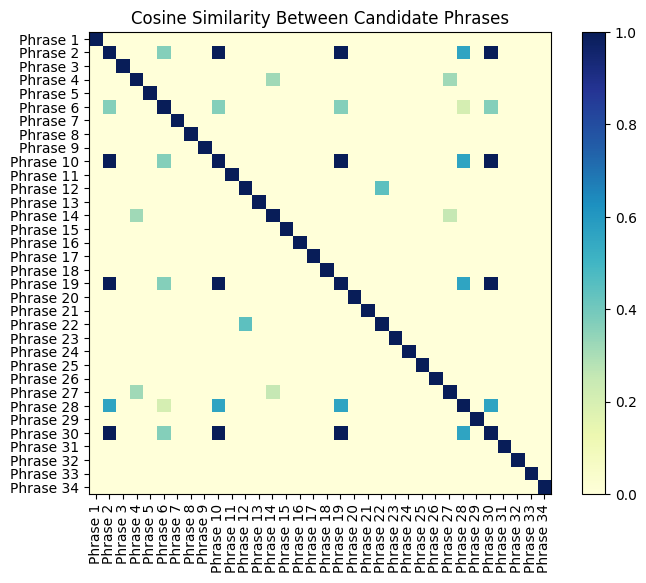


🔵 Ranked Phrases:

0.0329 → ai
0.0329 → ai
0.0329 → ai
0.0329 → ai
0.0300 → the globe
0.0294 → robotic surgeries
0.0294 → research organizations
0.0294 → personalized services
0.0294 → patient monitoring systems
0.0294 → job automation concerns
0.0294 → its advantages
0.0294 → intelligent traffic management
0.0294 → industries
0.0294 → healthcare
0.0294 → guidelines
0.0294 → governments
0.0294 → future innovations
0.0294 → fraud detection
0.0294 → financial institutions
0.0294 → ethical dilemmas
0.0294 → entertainment
0.0294 → education
0.0294 → data privacy issues
0.0294 → daily life
0.0294 → customer service chatbots
0.0294 → changes
0.0294 → autonomous vehicles
0.0294 → artificial intelligence
0.0294 → algorithmic trading
0.0294 → algorithmic bias
0.0291 → the transportation sector
0.0291 → the responsible development
0.0245 → ai technologies
0.0204 → ai-powered diagnosis tools


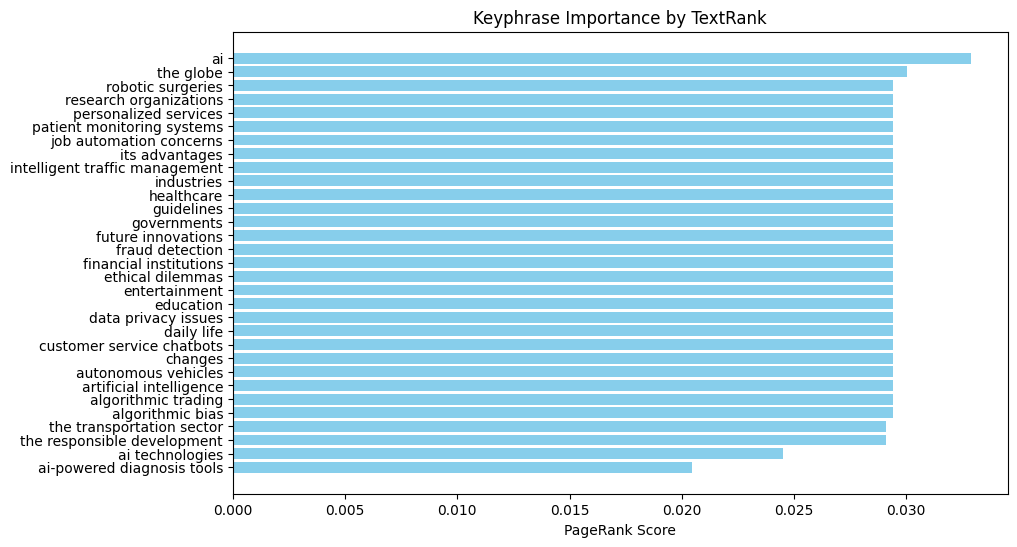

In [ ]:
# Step 1: Install libraries if not done yet
# pip install spacy scikit-learn networkx matplotlib

# Step 2: Imports
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 3: Load SpaCy Model
nlp = spacy.load('en_core_web_sm')

# Step 4: Input Better Example Text
text = """
Artificial Intelligence (AI) is revolutionizing industries across the globe. 
Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots. 
The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management. 
Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
"""

# Step 5: Candidate Phrase Extraction (Noun Chunks)
doc = nlp(text)
candidates = [chunk.text.lower().strip() for chunk in doc.noun_chunks if not chunk.root.is_stop and len(chunk.text.strip()) > 1]

print("\n🔵 Candidate Phrases:")
print(candidates)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(candidates)

print("\nTF-IDF Matrix Shape:", X.shape)

# Step 7: Cosine Similarity Matrix
similarity_matrix = cosine_similarity(X)

# Step 8: Visualize Similarity Matrix
plt.figure(figsize=(8,6))
plt.imshow(similarity_matrix, interpolation='nearest', cmap='YlGnBu')
plt.colorbar()
plt.title("Cosine Similarity Between Candidate Phrases")
plt.xticks(ticks=range(len(candidates)), labels=[f"Phrase {i+1}" for i in range(len(candidates))], rotation=90)
plt.yticks(ticks=range(len(candidates)), labels=[f"Phrase {i+1}" for i in range(len(candidates))])
plt.show()

# Step 9: Build Graph
nx_graph = nx.from_numpy_array(similarity_matrix)

# Step 10: Apply PageRank
scores = nx.pagerank(nx_graph)

# Step 11: Rank Phrases
ranked_phrases = sorted(((scores[i], phrase) for i, phrase in enumerate(candidates)), reverse=True)

print("\n🔵 Ranked Phrases:\n")
for score, phrase in ranked_phrases:
    print(f"{score:.4f} → {phrase}")

# Step 12: Bar Plot of Top Phrases
ranked_df = pd.DataFrame(ranked_phrases, columns=['PageRank Score', 'Phrase'])

plt.figure(figsize=(10,6))
plt.barh(ranked_df['Phrase'], ranked_df['PageRank Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('PageRank Score')
plt.title('Keyphrase Importance by TextRank')
plt.show()
